In [6]:
import os
import pandas as pd

path = '/home/ld_brito/DeepL/Testes_servidor/yolo_pytorch/results_v1/results_1635449775'

dict_eval = pd.DataFrame(columns = ['LR','GD','WD','mAP_0.5','mAP_0.5:0.95','precision','recall'])
for result in os.listdir(path):
    parameters = result.split('_')
    lr = parameters[1]
    gd = parameters[2]
    wd = parameters[3]
    for file in os.listdir(path+'/'+result):
        if file == 'results_cross_validation.txt':
            data = pd.read_csv(path+'/'+result+'/results_cross_validation.txt',sep='\t')
            row = {'LR':lr,'GD':gd,'WD':wd,'mAP_0.5':data['mAP_0.5'].iloc[-1],'mAP_0.5:0.95':data['mAP_0.5:0.95'].iloc[-1],'precision':data['precision'].iloc[-1],'recall':data['recall'].iloc[-1]}
            dict_eval = dict_eval.append(row,ignore_index=True)

In [7]:
dict_eval.sort_values(by='mAP_0.5',ascending=False)[:6]

,LR,GD,WD,mAP_0.5,mAP_0.5:0.95,precision,recall
110,0.01,0.9,5e-06,0.010085,0.002000,0.054427,0.087935
6,0.01,0.975,5e-05,0.005911,0.000941,0.043520,0.072096
66,0.01,0.99,0.0005,0.005832,0.001414,0.055345,0.079706
18,0.01,0.9,0.005,0.005505,0.001341,0.025490,0.068635
87,0.01,0.975,0.005,0.005079,0.001343,0.015484,0.136776
107,0.01,0.95,0.0005,0.004504,0.001147,0.043229,0.100503


In [8]:
dict_eval.sort_values(by='mAP_0.5:0.95',ascending=False)[:6]

,LR,GD,WD,mAP_0.5,mAP_0.5:0.95,precision,recall
110,0.01,0.9,5e-06,0.010085,0.002000,0.054427,0.087935
66,0.01,0.99,0.0005,0.005832,0.001414,0.055345,0.079706
87,0.01,0.975,0.005,0.005079,0.001343,0.015484,0.136776
18,0.01,0.9,0.005,0.005505,0.001341,0.025490,0.068635
107,0.01,0.95,0.0005,0.004504,0.001147,0.043229,0.100503
6,0.01,0.975,5e-05,0.005911,0.000941,0.043520,0.072096


In [12]:
dict_eval['classificado'] = 'Nao' 
dict_eval.loc[dict_eval['mAP_0.5']> 0.009,'classificado'] = 'Sim'
dict_eval['classificado'].value_counts()

Nao    124
Sim      1
Name: classificado, dtype: int64

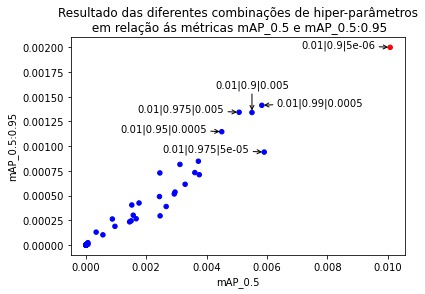

In [5]:
import matplotlib.pyplot as plt

shortlist = dict_eval.sort_values(by='mAP_0.5:0.95',ascending=False)[:6]

dict_eval.plot.scatter('mAP_0.5','mAP_0.5:0.95',c=['blue' if x=='Nao' else 'red' for x in dict_eval['classificado']])
plt.title('Resultado das diferentes combinações de hiper-parâmetros\n em relação ás métricas mAP_0.5 e mAP_0.5:0.95')

for x,y in zip(shortlist['mAP_0.5'].tolist(),shortlist['mAP_0.5:0.95'].tolist()):
    
    label_list = [shortlist[(shortlist['mAP_0.5'] == x) & (shortlist['mAP_0.5:0.95'] == y)].iloc[0]['LR'],
                 shortlist[(shortlist['mAP_0.5'] == x) & (shortlist['mAP_0.5:0.95'] == y)].iloc[0]['GD'],
                 shortlist[(shortlist['mAP_0.5'] == x) & (shortlist['mAP_0.5:0.95'] == y)].iloc[0]['WD']]
    label = '|'.join(label_list)
    
    if label == '0.01|0.99|0.0005':
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,0), # distance from text to points (x,y)
                 arrowprops = {'arrowstyle':'->'},
                 ha='left') # horizontal alignment can be left, right or center

    elif label == '0.01|0.9|0.005':
        plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,25), # distance from text to points (x,y)
                 arrowprops = {'arrowstyle':'->'},
                 ha='center') # horizontal alignment can be left, right or center
    else:
        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(-15,0), # distance from text to points (x,y)
                     arrowprops = {'arrowstyle':'->'},
                     ha='right') # horizontal alignment can be left, right or center

plt.savefig('first_selection.png',dpi=400)